# Employment Outcomes Based on College Majors

In this project, we'll be working with a dataset on the job outcomes of students who graduated from college from 2010 through 2012. The original data was released by the [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. [FiveThirtyEight](https://fivethirtyeight.com/) cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

We want to explore the dataset and answer questions like:

* Do students in more popular majors make more money?
* What does the unemployment rate look like across the sample size?
* Which majors have the highest percentage of women?

In [1]:
project_name = 'employment_outcomes'

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "arch-iansevilla/employment-outcomes" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/arch-iansevilla/employment-outcomes


'https://jovian.ml/arch-iansevilla/employment-outcomes'

## Data Preparation and Cleaning

Let's setup the environment by importing the libraries we need and running the necessary Jupyter magic so that any plots we generate are displayed inline. After that, we'll begin exploring the data and get better acquainted with it. This way, we'll get an idea of how to prepare it and clean it up. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


The summary statistics above allows us to get a feel for the data. We can see that there are 173 total entries, but it does seem like we have a row with missing data.

In [6]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Next, let's drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [7]:
recent_grads = recent_grads.dropna()

Let's commit the work we've done thus far and then move on to exploring this data visually. 

In [8]:
import jovian

In [9]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "arch-iansevilla/employment-outcomes" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/arch-iansevilla/employment-outcomes


'https://jovian.ml/arch-iansevilla/employment-outcomes'

## Exploratory Analysis and Visualization

Here, we'll import Seaborn and see if we can make better sense of our data visually. We'll generate a few exploratory plots before we move on to answering some of the questions we stated above.

<AxesSubplot:title={'center':'Employed vs. Sample_size'}, xlabel='Sample_size', ylabel='Employed'>

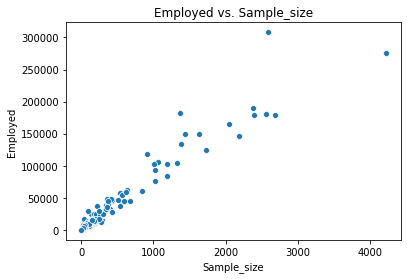

In [10]:
import seaborn as sns

plt.title('Employed vs. Sample_size')
sns.scatterplot(recent_grads['Sample_size'], recent_grads['Employed'])

<AxesSubplot:title={'center':'Median Salary vs. Sample_size'}, xlabel='Sample_size', ylabel='Median'>

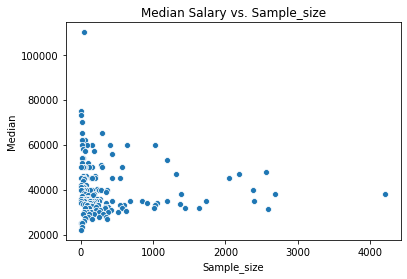

In [11]:
plt.title('Median Salary vs. Sample_size')
sns.scatterplot(recent_grads['Sample_size'], recent_grads['Median'])

<AxesSubplot:title={'center':'Unemployment Rate vs. Sample_size'}, xlabel='Sample_size', ylabel='Unemployment_rate'>

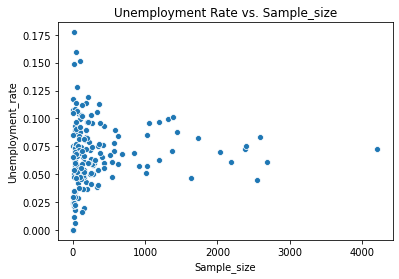

In [12]:
plt.title('Unemployment Rate vs. Sample_size')
sns.scatterplot(recent_grads['Sample_size'], recent_grads['Unemployment_rate'])

<AxesSubplot:title={'center':'Median vs. Full-time'}, xlabel='Full_time', ylabel='Median'>

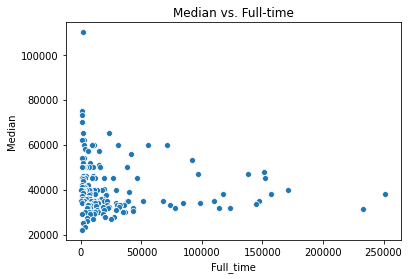

In [13]:
plt.title('Median vs. Full-time')
sns.scatterplot(recent_grads['Full_time'], recent_grads['Median'])

<AxesSubplot:title={'center':'Median vs. Men'}, xlabel='Men', ylabel='Median'>

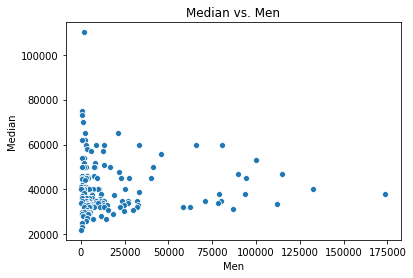

In [14]:
plt.title('Median vs. Men')
sns.scatterplot(recent_grads['Men'], recent_grads['Median'])

<AxesSubplot:title={'center':'Median vs. Women'}, xlabel='Women', ylabel='Median'>

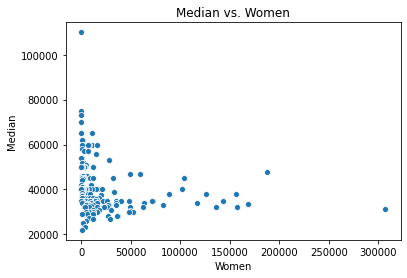

In [15]:
plt.title('Median vs. Women')
sns.scatterplot(recent_grads['Women'], recent_grads['Median'])

Above, we explored the dataset by using scatterplots and have found some interesting clues that can help us achieve the goals we set. Next, we dive deeper into the data and see if we can find some answers.

In [16]:
import jovian

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "arch-iansevilla/employment-outcomes" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/arch-iansevilla/employment-outcomes


'https://jovian.ml/arch-iansevilla/employment-outcomes'

## Asking and Answering Questions

Let's refer back to the original questions that we asked when we started this project:

* Do students in more popular majors make more money?
* What does the unemployment rate look like across the sample size?
* Which majors have the highest percentage of women?

We've found the answer to our first question in one of the plots we generated earlier:

<AxesSubplot:title={'center':'Median Salary vs. Sample_size'}, xlabel='Sample_size', ylabel='Median'>

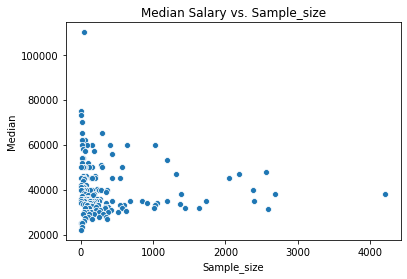

In [18]:
plt.title('Median Salary vs. Sample_size')
sns.scatterplot(recent_grads['Sample_size'], recent_grads['Median'])

We observe a cluster has formed at the bottom left of the scatter plot. While there are a couple of outliers, typically we can see that popular majors generally pay an average wage. Let's explore these outliers below.

In [19]:
recent_grads[recent_grads['Sample_size'] > 4000]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.47319,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395


`Business Management and Administration` seems to have the largest sample size, and yet pays about \$38,000, putting it squarely what we can observe as average.

In [20]:
recent_grads[recent_grads['Median'] > 100000]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


`Petroleum Engineering` has a modest sample size of 36, but pays a median salary of \$110,000.

This may be a case of "supply and demand". Few graduates coupled with a strong demand in the job market may be the answer to why this major pays so much higher than the others.

Next, we tackle our second question:
*What does the unemployment rate look like across the sample size?*

<AxesSubplot:title={'center':'Unemployment Rate vs. Sample_size'}, xlabel='Sample_size', ylabel='Unemployment_rate'>

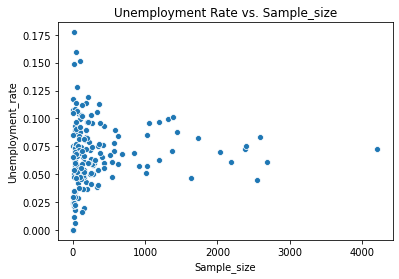

In [21]:
plt.title('Unemployment Rate vs. Sample_size')
sns.scatterplot(recent_grads['Sample_size'], recent_grads['Unemployment_rate'])

Again, we see a handful of outliers with very high unemployment rates among graduates. Let's explore this further.

In [22]:
recent_grads[recent_grads['Unemployment_rate'] > 0.125]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
29,30,5402,PUBLIC POLICY,5978.0,2639.0,3339.0,Law & Public Policy,0.558548,55,4547,...,1306,2776,670,0.128426,50000,35000,70000,1550,1871,340
84,85,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,7613.0,5291.0,2322.0,Computers & Mathematics,0.305005,97,6144,...,1447,4369,1100,0.151850,36400,27000,49000,2593,2941,352
89,90,5401,PUBLIC ADMINISTRATION,5629.0,2947.0,2682.0,Law & Public Policy,0.476461,46,4158,...,847,2952,789,0.159491,36000,23000,60000,919,2313,496
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622


These results are very surprising. Based on their categories, these five fields seem completely unrelated to each other, save for `Public Policy` and `Public Administration`. Also, we find that `Nuclear Engineering` has the highest unemployment rate at almost 18%!

Lastly, let's try to find the answer to our third question: *Which majors have the highest percentage of women?

[Text(0, 0, 'PETROLEUM ENGINEERING'),
 Text(1, 0, 'MINING AND MINERAL ENGINEERING'),
 Text(2, 0, 'METALLURGICAL ENGINEERING'),
 Text(3, 0, 'NAVAL ARCHITECTURE AND MARINE ENGINEERING'),
 Text(4, 0, 'CHEMICAL ENGINEERING'),
 Text(5, 0, 'NUCLEAR ENGINEERING'),
 Text(6, 0, 'ACTUARIAL SCIENCE'),
 Text(7, 0, 'ASTRONOMY AND ASTROPHYSICS'),
 Text(8, 0, 'MECHANICAL ENGINEERING'),
 Text(9, 0, 'ELECTRICAL ENGINEERING'),
 Text(10, 0, 'COMPUTER ENGINEERING'),
 Text(11, 0, 'AEROSPACE ENGINEERING'),
 Text(12, 0, 'BIOMEDICAL ENGINEERING'),
 Text(13, 0, 'MATERIALS SCIENCE'),
 Text(14, 0, 'ENGINEERING MECHANICS PHYSICS AND SCIENCE'),
 Text(15, 0, 'BIOLOGICAL ENGINEERING'),
 Text(16, 0, 'INDUSTRIAL AND MANUFACTURING ENGINEERING'),
 Text(17, 0, 'GENERAL ENGINEERING'),
 Text(18, 0, 'ARCHITECTURAL ENGINEERING'),
 Text(19, 0, 'COURT REPORTING'),
 Text(20, 0, 'COMPUTER SCIENCE'),
 Text(21, 0, 'ELECTRICAL ENGINEERING TECHNOLOGY'),
 Text(22, 0, 'MATERIALS ENGINEERING AND MATERIALS SCIENCE'),
 Text(23, 0, 'MANAG

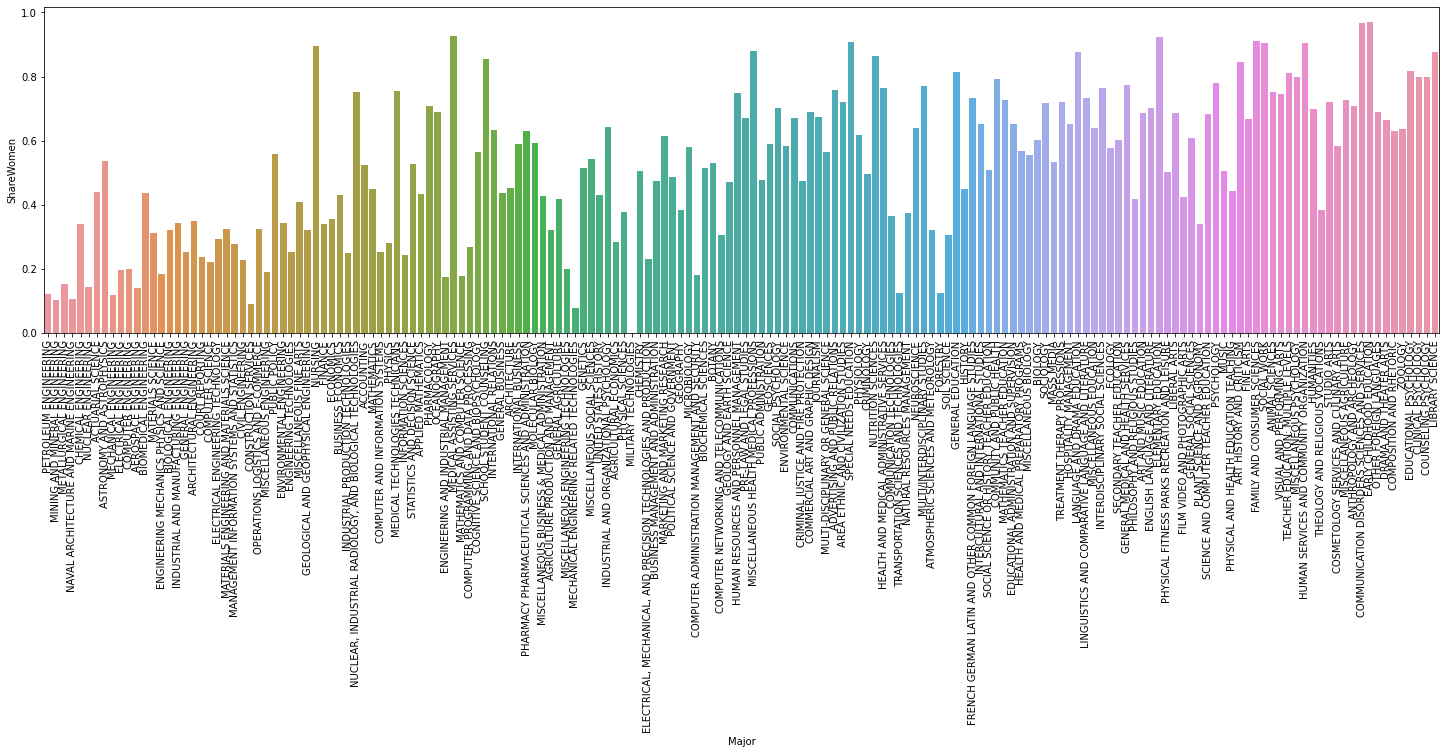

In [23]:
plt.figure(figsize=(25, 6))
share_women = sns.barplot(recent_grads['Major'], recent_grads['ShareWomen'])
share_women.set_xticklabels(recent_grads['Major'], rotation = 90)

Plotting all 172 majors turned out to be quite hairy and frankly, illegible. Let's focus on, say, the top 10 majors with the highest percentage of female graduates.

In [24]:
top_10_females = recent_grads.sort_values('ShareWomen', ascending = False).head(10)
top_10_females

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,...,7001,20748,1360,0.040105,28000,21000,35000,23515,7705,2868
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,...,13862,14460,1487,0.047584,28000,20000,40000,19957,9404,5125
51,52,6104,MEDICAL ASSISTING SERVICES,11123.0,803.0,10320.0,Health,0.927807,67,9168,...,4107,4290,407,0.042507,42000,30000,65000,2091,6948,1270
138,139,2304,ELEMENTARY EDUCATION,170862.0,13029.0,157833.0,Education,0.923745,1629,149339,...,37965,86540,7297,0.046586,32000,23400,38000,108085,36972,11502
150,151,2901,FAMILY AND CONSUMER SCIENCES,58001.0,5166.0,52835.0,Industrial Arts & Consumer Services,0.910933,518,46624,...,15872,26906,3355,0.067128,30000,22900,40000,20985,20133,5248
100,101,2310,SPECIAL NEEDS EDUCATION,28739.0,2682.0,26057.0,Education,0.906677,246,24639,...,5153,16642,1067,0.041508,35000,32000,42000,20185,3797,1179
156,157,5403,HUMAN SERVICES AND COMMUNITY ORGANIZATION,9374.0,885.0,8489.0,Psychology & Social Work,0.905590,89,8294,...,2405,5061,326,0.037819,30000,24000,35000,2878,4595,724
151,152,5404,SOCIAL WORK,53552.0,5137.0,48415.0,Psychology & Social Work,0.904075,374,45038,...,13481,27588,3329,0.068828,30000,25000,35000,27449,14416,4344
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
88,89,6199,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,13386.0,1589.0,11797.0,Health,0.881294,81,10076,...,4145,5868,893,0.081411,36000,23000,42000,5652,3835,1422


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'EARLY CHILDHOOD EDUCATION'),
  Text(1, 0, 'COMMUNICATION DISORDERS SCIENCES AND SERVICES'),
  Text(2, 0, 'MEDICAL ASSISTING SERVICES'),
  Text(3, 0, 'ELEMENTARY EDUCATION'),
  Text(4, 0, 'FAMILY AND CONSUMER SCIENCES'),
  Text(5, 0, 'SPECIAL NEEDS EDUCATION'),
  Text(6, 0, 'HUMAN SERVICES AND COMMUNITY ORGANIZATION'),
  Text(7, 0, 'SOCIAL WORK'),
  Text(8, 0, 'NURSING'),
  Text(9, 0, 'MISCELLANEOUS HEALTH MEDICAL PROFESSIONS')])

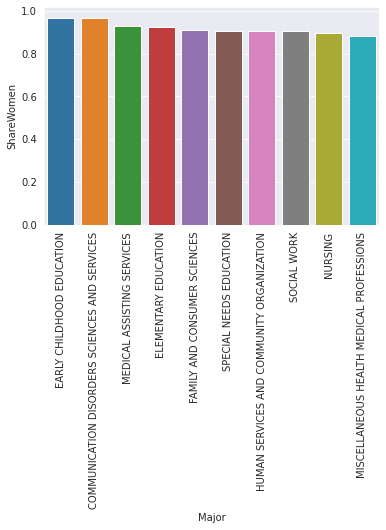

In [25]:
# plt.figure(figsize=(6, 6))
sns.set_style('darkgrid')
top_10 = sns.barplot(top_10_females['Major'], top_10_females['ShareWomen'])
plt.xticks(rotation=90)

It looks like the major categories with the highest percentage of female graduates are either in Education or Health. The college major with the highest percentage overall is `Early Childhood Education` with nearly 97%.

In [26]:
import jovian

In [27]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "arch-iansevilla/employment-outcomes" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/arch-iansevilla/employment-outcomes


'https://jovian.ml/arch-iansevilla/employment-outcomes'

## Inferences and Conclusion

And with that, we've answered the questions we sought out and then some. We've made good use of Matplotlib and Seaborn to help us visualize this data.

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "arch-iansevilla/employment-outcomes" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/arch-iansevilla/employment-outcomes


'https://jovian.ml/arch-iansevilla/employment-outcomes'

## References and Future Work

This project was loosely based on a mission from [Dataquest](https://www.dataquest.io/).
Other sources are as follows:
* [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducted the surveys and aggregated the data. 
* [FiveThirtyEight](https://fivethirtyeight.com/) cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "arch-iansevilla/employment-outcomes" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/arch-iansevilla/employment-outcomes


'https://jovian.ml/arch-iansevilla/employment-outcomes'